In [9]:
import matplotlib.pyplot as plt #General Plotting
import numpy as np
from scipy.stats import multivariate_normal

# Set seed to generate reproducible "pseudo-randomness" (handles scipy's "randomness" too)
np.random.seed(4)

In [30]:
def generateRandomGaussianData(N,priors,mu,sigma,plot2D=False):

    n = mu.shape[1] # sample dimensions (2)
    C = len(priors) # Classes (4)

    # set thresholds
    thresholds = np.cumsum(priors)
    thresholds = np.insert(thresholds,0,0)

    X = np.zeros([N,n]) # create empty matrix
    labels = np.zeros(N) # create empty labels array
    Nl = np.zeros(C).astype(int)
    u = np.random.rand(N) # Create vector of uniformly distributed random variables

    for i in range(C):
        indices = np.argwhere((thresholds[i] <= u) & (u <= thresholds[i+1]))[:, 0] # Find indices of u that meet each prior
        Nl[i] = len(indices) # Get the number of indices in each component
        labels[indices] = i * np.ones(Nl[i]) # set label vector
        X[indices, :] = multivariate_normal.rvs(mu[i], sigma[i], Nl[i]) # for each valid index, fill the 


    if plot2D == True:
        fig = plt.figure(figsize=(10, 10))
        marker_shapes = '....'
        marker_colors = 'rbgy' 

        n = mu.shape[1] # sample dimensions (2)
        C = len(priors) # Classes (4)
        L = np.array(range(C)) # labels [0 1 2 3]
        Y = np.array(range(C))  # 0-(C-1)

        for i in range(C): 
            if n = 2:
                plt.plot(X[labels==i, 0], X[labels==i, 1], marker_shapes[i-1] + marker_colors[i-1], label="True Class {}".format(i))
            elif n = 3:
                plt.plot(X[labels==i, 0], X[labels==i, 1], X[labels==i, 2], marker=marker_shapes[i], c=marker_colors[i], label="True Class {}".format(i))

        # Plot the original data and their true labels
        plt.legend()
        plt.xlabel(r"$x_1$")
        plt.ylabel(r"$x_2$")
        if n=3: plt.zlabel(r"$x_3$")
        plt.title("Generated Original Data Samples")
        plt.tight_layout()
        plt.show()

    return X, labels, Nl


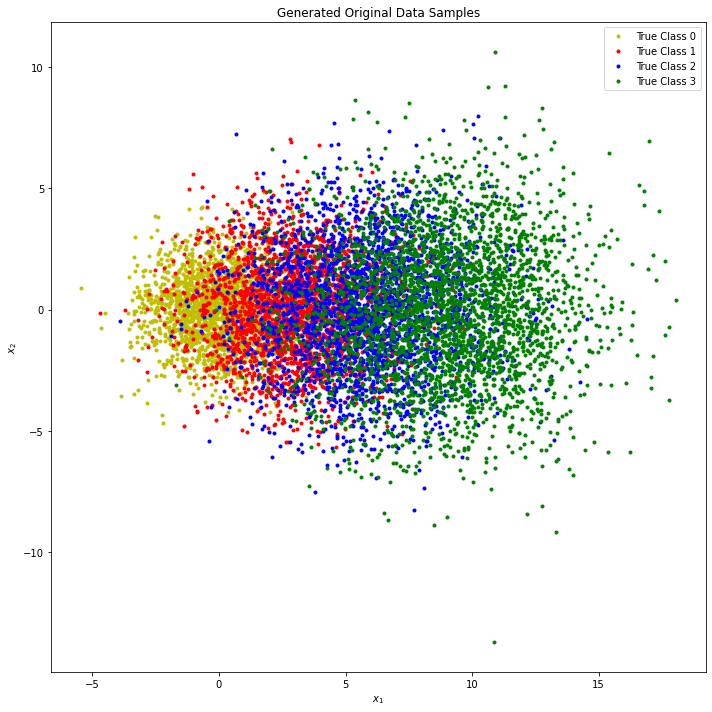

In [31]:
N = 10000 # samples
priors = np.array([.2,.25,.25,.3]) # Given Priors

# ARBITRARILY CHOSEN mean and covariance matrix
# equally spaced means along a line
mu =np.array([[0, 0],[3, 0],[6, 0],[9, 0]])
# scaled versions of the identity matrix with overlap
sigma =[[[2, 0],[0, 2]],
        [[4, 0],[0, 4]],
        [[6, 0],[0, 6]],
        [[8, 0],[0, 8]]]


X, labels, Nl = generateRandomGaussianData(N,priors,mu,sigma, plot2D=True)

n = mu.shape[1] # sample dimensions (2)
C = len(priors) # Classes (4)
L = np.array(range(C)) # labels [0 1 2 3]
Y = np.array(range(C))  # 0-(C-1)


In [28]:
# Lambda Matrix
lambda_matrix = np.ones((C, C)) - np.identity(C)

# Calculate class-conditional likelihoods p(x|Y=j) for each label of the N observations
class_cond_likelihoods = np.array([multivariate_normal.pdf(X, mu[j], sigma[j]) for j in Y])
class_priors = np.diag(priors)
class_posteriors = class_priors.dot(class_cond_likelihoods)

# We want to create the risk matrix of size 3 x N 
cond_risk = lambda_matrix.dot(class_posteriors)

# Get the decision for each column in risk_mat
decisions = np.argmin(cond_risk, axis=0)

Confusion matrix:
[[0.834 0.186 0.029 0.003]
 [0.165 0.606 0.278 0.059]
 [0.    0.194 0.41  0.213]
 [0.    0.014 0.282 0.725]]
Minimum Probability of Error:
0.3622696000000001


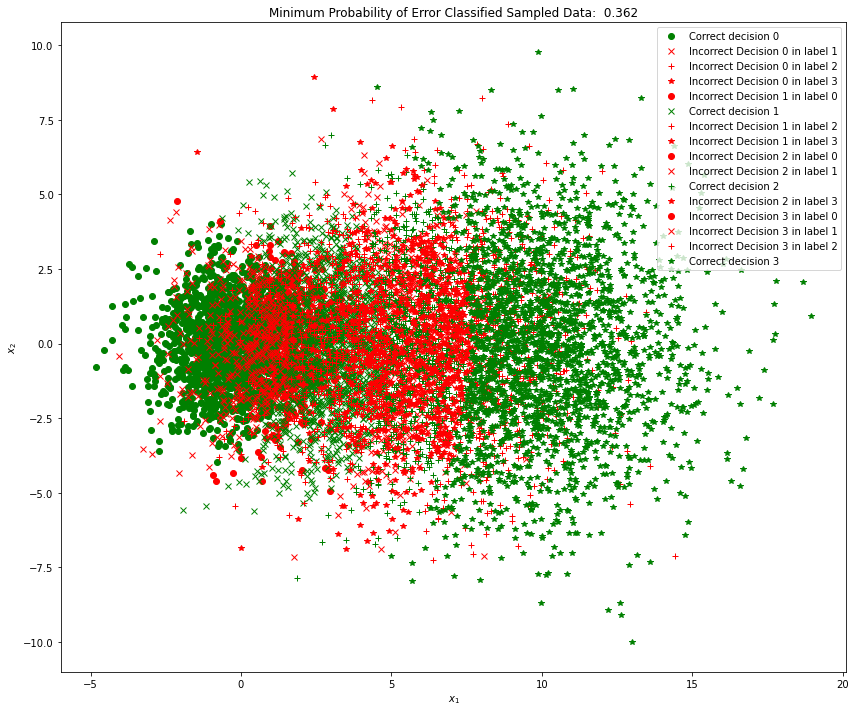

In [29]:
# Plot for decisions vs true labels
fig = plt.figure(figsize=(12, 10))
marker_shapes = 'ox+*.' # Accomodates up to C=5
marker_colors = 'brgmy'

# Get sample class counts
sample_class_counts = np.array([sum(labels == j) for j in Y])

# Confusion matrix
conf_mat = np.zeros((C, C))
for i in Y: # Each decision option
    for j in Y: # Each class label
        ind_ij = np.argwhere((decisions==i) & (labels==j))
        conf_mat[i, j] = round(len(ind_ij)/sample_class_counts[j],3) # Average over class sample count
        if i == j:
            # True label = Marker shape; Decision = Marker Color
            marker = marker_shapes[j] + marker_colors[i]
            plt.plot(X[ind_ij, 0], X[ind_ij, 1], 'g'+marker_shapes[j], markersize=6,label="Correct decision {}".format(i))
        else:
            plt.plot(X[ind_ij, 0], X[ind_ij, 1], 'r'+marker_shapes[j], markersize=6,label="Incorrect Decision {} in label {}".format(i,j))
            
print("Confusion matrix:")
print(conf_mat)

print("Minimum Probability of Error:")
prob_error = 1 - np.diag(conf_mat).dot(sample_class_counts / N)
print(prob_error)

plt.legend()
plt.title("Minimum Probability of Error Classified Sampled Data:  {:.3f}".format(prob_error))
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.tight_layout()
plt.show()




[3 1 3 ... 2 1 0]
Confusion matrix:
[[0.796 0.183 0.021 0.002]
 [0.202 0.557 0.21  0.043]
 [0.002 0.248 0.506 0.245]
 [0.    0.011 0.263 0.71 ]]
Minimum Probability of Error:
0.3611567


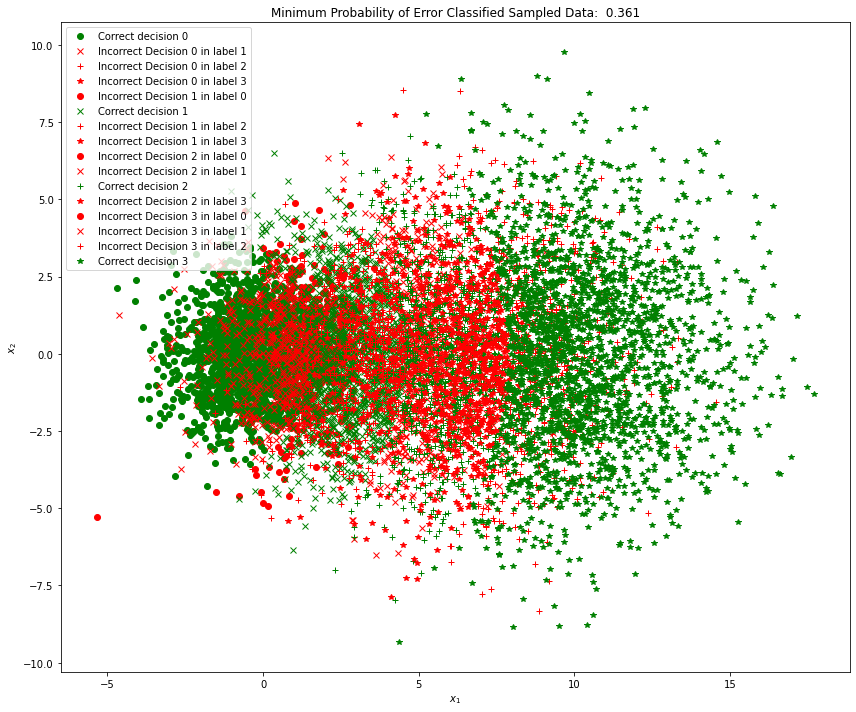

In [45]:
# Part B
lambda_matrix_b =np.array([[ 0, 1, 2, 3],[1, 0, 1, 2],[2, 1, 0, 1],[3, 2, 1, 0]])

# We want to create the risk matrix of size 3 x N 
cond_risk_b = lambda_matrix_b.dot(class_posteriors)

# Get the decision for each column in risk_mat
decisions_b = np.argmin(cond_risk_b, axis=0)
print(decisions_b)

# Plot for decisions vs true labels
fig = plt.figure(figsize=(12, 10))
marker_shapes = 'ox+*.' # Accomodates up to C=5
marker_colors = 'brgmy'

# Get sample class counts
sample_class_counts = np.array([sum(labels == j) for j in Y])

# Confusion matrix
conf_mat_b = np.zeros((C, C))
for i in Y: # Each decision option
    for j in Y: # Each class label
        ind_ij = np.argwhere((decisions_b==i) & (labels==j))
        conf_mat_b[i, j] = round(len(ind_ij)/sample_class_counts[j],3) # Average over class sample count

        if i == j:
            # True label = Marker shape; Decision = Marker Color
            marker = marker_shapes[j] + marker_colors[i]
            plt.plot(X[ind_ij, 0], X[ind_ij, 1], 'g'+marker_shapes[j], markersize=6,label="Correct decision {}".format(i))

        else:
            plt.plot(X[ind_ij, 0], X[ind_ij, 1], 'r'+marker_shapes[j], markersize=6,label="Incorrect Decision {} in label {}".format(i,j))
            
print("Confusion matrix:")
print(conf_mat_b)

print("Minimum Probability of Error:")
prob_error_b = 1 - np.diag(conf_mat_b).dot(sample_class_counts / N)
print(prob_error_b)

plt.legend()
plt.title("Minimum Probability of Error Classified Sampled Data:  {:.3f}".format(prob_error_b))
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.tight_layout()
plt.show()


In [7]:
# Pa rtB
#cr e ate new lambda_matrix
lambda_matrix_b =[[ 0, 1, 2, 3],[1, 0, 1, 2],[2, 1, 0, 1],[3, 2, 1, 0]]
loss_matrix =[[ 0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0]]
# plotnew d ata us ing get_MAP f u n ctionabov e
plt.figure(2)
correct,incorrect= get_MAP(0, lambda_matrix_b)
plt.scatter(correct[ 0], correct[ 1], c= 'g', marker= 'o',label= ' Cor rectClass0 ')
plt.scatter(incorrect[ 0],incorrect[ 1], c= 'r', marker= 'o',label= ' In correctClass0 ')
correct,incorrect= get_MAP(1, lambda_matrix_b)
plt.scatter(correct[ 0], correct[ 1], c= 'g', marker= 'v',label= ' Cor rectClass1 ')
plt.scatter(incorrect[ 0],incorrect[ 1], c= 'r', marker= 'v',label= ' In correctClass1 ')
correct,incorrect= get_MAP(2, lambda_matrix_b)
plt.scatter(correct[ 0], correct[ 1], c= 'g', marker= 's',label= ' Cor rectClass2 ')
plt.scatter(incorrect[ 0],incorrect[ 1], c= 'r', marker= 's',label= ' In correctClass2 ')
correct,incorrect= get_MAP(3, lambda_matrix_b)
plt.scatter(correct[ 0], correct[ 1], c= 'g', marker= 'p',label= ' Cor rectClass3 ')

plt.scatter(incorrect[ 0],incorrect[ 1], c= 'r', marker= 'p',label= ' In correctClass4 ')
plt.legend()
plt.title('Vi sual Representat ion of MAP Cl assific ation for Modified Lambda_matrix ')
plt.xlabel('X ')
plt.ylabel('y')
plt.show()
# calculatetotallos s
total_loss= 0
for i in range(0, 4):
        for j in range(0, 4):
            if i != j :
                total_loss=total_loss+ loss_matrix [i][j]
print(total_loss/N)
# calculate con f u sio n matrix from lossmatr ix
for i in range(0, 4):
    loss_matrix [i] =[x / N_samples [i] for x in loss_matrix [i]]
print(loss_matrix)





NameError: name 'get_MAP' is not defined

<Figure size 432x288 with 0 Axes>